In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
# Load Dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)


In [4]:
# Normalize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [6]:
# Train KNN for different values of K
k_values = range(1, 11)
accuracies = []


In [7]:

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k} | Accuracy: {acc:.2f}")


K=1 | Accuracy: 0.98
K=2 | Accuracy: 0.98
K=3 | Accuracy: 1.00
K=4 | Accuracy: 0.98
K=5 | Accuracy: 1.00
K=6 | Accuracy: 1.00
K=7 | Accuracy: 1.00
K=8 | Accuracy: 1.00
K=9 | Accuracy: 1.00
K=10 | Accuracy: 1.00


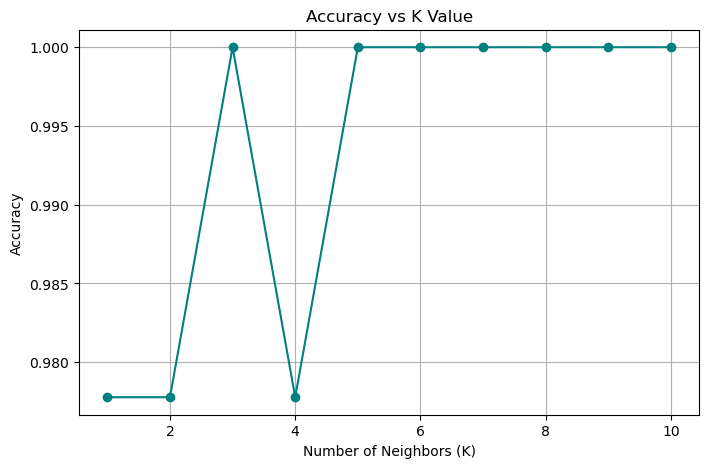

In [8]:
# Plot Accuracy vs K
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='teal')
plt.title('Accuracy vs K Value')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [9]:
# Best Model Evaluation
best_k = k_values[np.argmax(accuracies)]
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)

print("\n✅ Best K:", best_k)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))



✅ Best K: 3
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



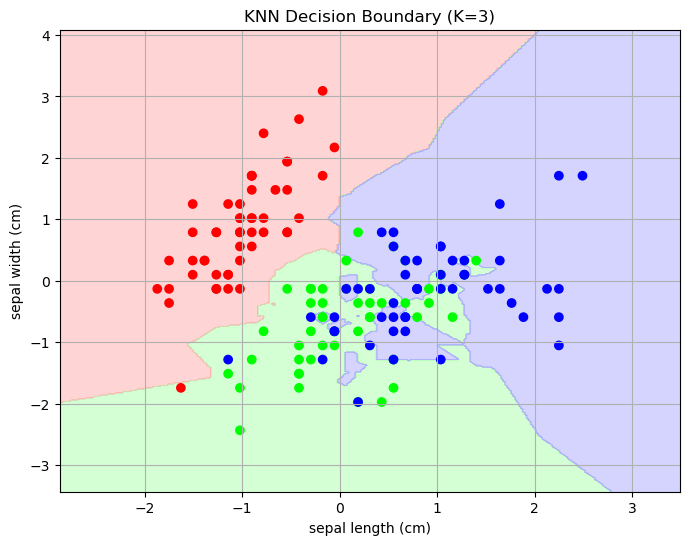

In [10]:
# Use only first two features for 2D visualization
X_vis = X_scaled[:, :2]
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X_vis, y, test_size=0.3, random_state=42)

model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train_v, y_train_v)

# Plot decision boundaries
from matplotlib.colors import ListedColormap

h = .02  # step size in the mesh
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']), alpha=0.5)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))
plt.title(f"KNN Decision Boundary (K={best_k})")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.grid(True)
plt.show()
